In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
house = pd.read_csv("House-Price.csv")
house.head()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146,1
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764,0
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151,0
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474,0


In [37]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
price          506 non-null float64
resid_area     506 non-null float64
air_qual       506 non-null float64
room_num       506 non-null float64
age            506 non-null float64
dist1          506 non-null float64
dist2          506 non-null float64
dist3          506 non-null float64
dist4          506 non-null float64
teachers       506 non-null float64
poor_prop      506 non-null float64
airport        506 non-null object
n_hos_beds     498 non-null float64
n_hot_rooms    506 non-null float64
waterbody      506 non-null object
rainfall       506 non-null int64
bus_ter        506 non-null object
parks          506 non-null float64
Sold           506 non-null int64
dtypes: float64(14), int64(2), object(3)
memory usage: 69.2+ KB


In [38]:
house.describe()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454,0.454545
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632,0.498422
min,5.000000,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292,0.000000
25%,17.025000,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464,0.000000
50%,21.200000,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507,0.000000
75%,25.000000,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397,1.000000
max,50.000000,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711,1.000000


In [39]:
house.isna().sum()

price          0
resid_area     0
air_qual       0
room_num       0
age            0
dist1          0
dist2          0
dist3          0
dist4          0
teachers       0
poor_prop      0
airport        0
n_hos_beds     8
n_hot_rooms    0
waterbody      0
rainfall       0
bus_ter        0
parks          0
Sold           0
dtype: int64

In [40]:
#lets see the cat. variables one by one

#airport

house.airport.nunique()
#each group, see count
house['airport'].value_counts()

house['airport'] = house['airport'].map({'YES': 1, 'NO': 0})

# now proportion
house['airport'].value_counts(normalize = True).mul(100).round(1)

1    55.1
0    44.9
Name: airport, dtype: float64

In [41]:
house.head()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,1,5.480,11.1920,River,23,YES,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,0,7.332,12.1728,Lake,42,YES,0.046146,1
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,0,7.394,101.1200,None,38,YES,0.045764,0
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,1,9.268,11.2672,Lake,45,YES,0.047151,0
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,0,8.824,11.2896,Lake,55,YES,0.039474,0


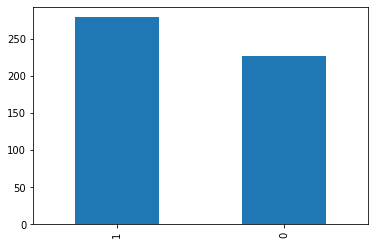

In [42]:
#for airport
house['airport'].value_counts().plot(kind = 'bar')

In [43]:
#dropping the bus_ter column
house.drop('bus_ter',axis = 1,inplace = True)

In [44]:
### we have 4 distances, so lets just take an average
house["avg_dist"] = house[["dist1","dist2","dist3","dist4"]].mean(axis=1)
house

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,Sold,avg_dist
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,1,5.480,11.1920,River,23,0.049347,0,4.0875
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,0,7.332,12.1728,Lake,42,0.046146,1,4.9675
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,0,7.394,101.1200,None,38,0.045764,0,4.9675
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,1,9.268,11.2672,Lake,45,0.047151,0,6.0650
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,0,8.824,11.2896,Lake,55,0.039474,0,6.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,0,9.348,12.1792,Lake and River,27,0.056006,1,2.4775
502,20.6,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,1,6.612,13.1648,Lake and River,20,0.059903,1,2.2875
503,23.9,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,0,5.478,12.1912,None,31,0.057572,1,2.1675
504,22.0,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,1,7.940,15.1760,None,47,0.060694,1,2.3900


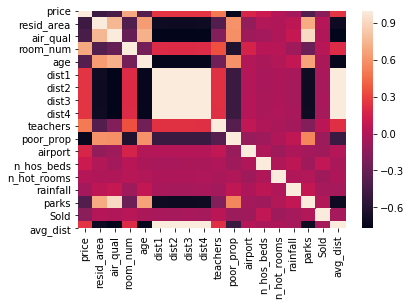

In [45]:
#check correlation between dist1-4 and avg before deleting them
# sir told to check full together using heatmap
# see how to check dist1-4 and avg_dist
sns.heatmap(house.corr())

In [46]:
#now drop it
house.drop(["dist1","dist2","dist3","dist4"], axis = 1, inplace = True)

In [47]:
# Lets start univariate analysis now

In [48]:
house['room_num'].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: room_num, dtype: float64

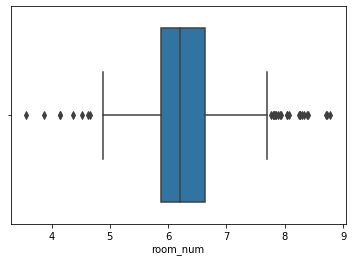

In [49]:
house['room_num'].skew()
house['room_num'].isnull().sum()
sns.boxplot(house['room_num'])

In [50]:
# outliers treatment
print(house['room_num'].quantile(0.050)) 
print(house['room_num'].quantile(0.95)) 
house['room_num'] = np.where(house['room_num'] > 7.5875 , 7.5 , house['room_num'])
house['room_num'] = np.where(house['room_num'] < 5 , 5 , house['room_num'])


house["room_num"].describe()


5.314
7.5875


count    506.000000
mean       6.268490
std        0.595608
min        5.000000
25%        5.885500
50%        6.208500
75%        6.623500
max        7.520000
Name: room_num, dtype: float64

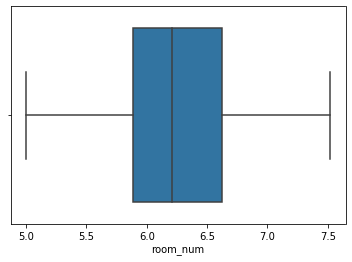

In [51]:
sns.boxplot(house['room_num']) #all outliers is gone

In [52]:
house

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,Sold,avg_dist
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,1,5.480,11.1920,River,23,0.049347,0,4.0875
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,0,7.332,12.1728,Lake,42,0.046146,1,4.9675
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,0,7.394,101.1200,None,38,0.045764,0,4.9675
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,1,9.268,11.2672,Lake,45,0.047151,0,6.0650
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,0,8.824,11.2896,Lake,55,0.039474,0,6.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,41.93,0.573,6.593,69.1,19.0,9.67,0,9.348,12.1792,Lake and River,27,0.056006,1,2.4775
502,20.6,41.93,0.573,6.120,76.7,19.0,9.08,1,6.612,13.1648,Lake and River,20,0.059903,1,2.2875
503,23.9,41.93,0.573,6.976,91.0,19.0,5.64,0,5.478,12.1912,None,31,0.057572,1,2.1675
504,22.0,41.93,0.573,6.794,89.3,19.0,6.48,1,7.940,15.1760,None,47,0.060694,1,2.3900


In [53]:
house['n_hos_beds'].skew()

-0.009175681230170077

In [54]:
house['n_hos_beds'].isnull().sum()

8

In [55]:
#replace with mean 
#using where function
house['n_hos_beds'] = np.where(house['n_hos_beds'].isnull() == True , np.mean(house['n_hos_beds']), house['n_hos_beds'])

In [56]:
house['n_hos_beds'].isnull().sum()# 0 null values

0

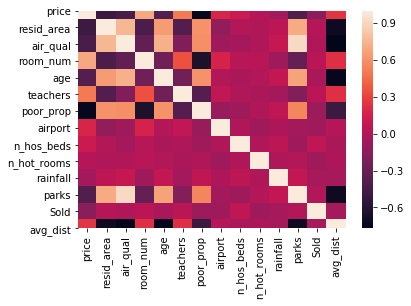

In [57]:
sns.heatmap(house.corr())

In [58]:
#now add this to the main dataset and drop waterbody
#Adding the results to the master dataframe
#house = pd.concat([house,status],axis=1)

##house.head()


In [59]:
#sold

house.Sold.nunique()
#each group, see count
house['Sold'].value_counts()

#house['Sold'] = house['Sold'].map({0: 'NO', 1: 'YES'})
#house['Sold'] = house['Sold'].astype(str)

0    276
1    230
Name: Sold, dtype: int64

In [60]:
house.head()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,Sold,avg_dist
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,1,5.480,11.1920,River,23,0.049347,0,4.0875
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,0,7.332,12.1728,Lake,42,0.046146,1,4.9675
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,0,7.394,101.1200,None,38,0.045764,0,4.9675
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,1,9.268,11.2672,Lake,45,0.047151,0,6.0650
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,0,8.824,11.2896,Lake,55,0.039474,0,6.0625


In [61]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

house_cont = house.drop(['waterbody'], axis = 1)

house_cont = sc.fit_transform(house_cont)

print(house.head())
house_cont = pd.DataFrame(house_cont,columns=['price','resid_area','air_qual','room_num','age','techers','poor_prop','airport','n_hos_beds','n_hot_rooms','rainfall','parks','avg_dist','Sold'])
house_cont.head()

   price  resid_area  air_qual  room_num   age  teachers  poor_prop  airport  \
0   24.0       32.31     0.538     6.575  65.2      24.7       4.98        1   
1   21.6       37.07     0.469     6.421  78.9      22.2       9.14        0   
2   34.7       37.07     0.469     7.185  61.1      22.2       4.03        0   
3   33.4       32.18     0.458     6.998  45.8      21.3       2.94        1   
4   36.2       32.18     0.458     7.147  54.2      21.3       5.33        0   

   n_hos_beds  n_hot_rooms waterbody  rainfall     parks  Sold  avg_dist  
0       5.480      11.1920     River        23  0.049347     0    4.0875  
1       7.332      12.1728      Lake        42  0.046146     1    4.9675  
2       7.394     101.1200      None        38  0.045764     0    4.9675  
3       9.268      11.2672      Lake        45  0.047151     0    6.0650  
4       8.824      11.2896      Lake        55  0.039474     0    6.0625  


,price,resid_area,air_qual,room_num,age,techers,poor_prop,airport,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,Sold
0,0.160376,-1.287909,-0.144217,0.515126,-0.120013,1.459000,-1.075562,0.902009,-1.653421,-0.353398,-1.294408,-0.480763,-0.912871,0.138986
1,-0.101258,-0.593381,-0.740262,0.256311,0.367166,0.303094,-0.492439,-1.108637,-0.387954,-0.166000,0.225431,-0.782183,1.095445,0.557282
2,1.326830,-0.593381,-0.740262,1.540303,-0.265812,0.303094,-1.208727,-1.108637,-0.345589,16.828839,-0.094535,-0.818115,-0.912871,0.557282
3,1.185112,-1.306878,-0.835284,1.226027,-0.809889,-0.113032,-1.361517,0.902009,0.934910,-0.339029,0.465405,-0.687571,-0.912871,1.078962
4,1.490352,-1.306878,-0.835284,1.476439,-0.511180,-0.113032,-1.026501,-1.108637,0.631526,-0.334750,1.265320,-1.410280,-0.912871,1.077774


In [62]:
# now create dummy variables for the two categorical columns from house 
# now create dummy variables for the two categorical columns from A 

house_cat = house[['waterbody']]

#now dummy this
house_cat_dum = pd.get_dummies(house_cat[['waterbody']], drop_first = True) 
house_cat_dum.head()

,waterbody_Lake and River,waterbody_None,waterbody_River
0,0,0,1
1,0,0,0
2,0,1,0
3,0,0,0
4,0,0,0


In [63]:
house_master = pd.concat([house_cont,house_cat_dum],axis=1)
house_master.head()

,price,resid_area,air_qual,room_num,age,techers,poor_prop,airport,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,Sold,waterbody_Lake and River,waterbody_None,waterbody_River
0,0.160376,-1.287909,-0.144217,0.515126,-0.120013,1.459000,-1.075562,0.902009,-1.653421,-0.353398,-1.294408,-0.480763,-0.912871,0.138986,0,0,1
1,-0.101258,-0.593381,-0.740262,0.256311,0.367166,0.303094,-0.492439,-1.108637,-0.387954,-0.166000,0.225431,-0.782183,1.095445,0.557282,0,0,0
2,1.326830,-0.593381,-0.740262,1.540303,-0.265812,0.303094,-1.208727,-1.108637,-0.345589,16.828839,-0.094535,-0.818115,-0.912871,0.557282,0,1,0
3,1.185112,-1.306878,-0.835284,1.226027,-0.809889,-0.113032,-1.361517,0.902009,0.934910,-0.339029,0.465405,-0.687571,-0.912871,1.078962,0,0,0
4,1.490352,-1.306878,-0.835284,1.476439,-0.511180,-0.113032,-1.026501,-1.108637,0.631526,-0.334750,1.265320,-1.410280,-0.912871,1.077774,0,0,0


In [64]:
# saving the dataframe 
#house_master.to_csv('house_master.csv') 

# Splitting into train and test 

In [66]:
# Putting feature variable to X
x_final = house_master[['price', 'resid_area', 'air_qual', 'room_num', 'age', 'techers',
       'poor_prop', 'airport', 'n_hos_beds', 'n_hot_rooms', 'rainfall',
       'parks', 'avg_dist', 'waterbody_Lake and River', 'waterbody_None',
       'waterbody_River']]

# Putting response variable to y
y = house_master['Sold']


In [67]:
# Train Test Splitting 
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x_final, y, test_size = 0.30, random_state=0)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (354, 16)
x_test  (152, 16)
y_train  (354,)
y_test  (152,)


In [68]:
from sklearn.linear_model import LogisticRegression
glm=LogisticRegression()
model=glm.fit(x_train,y_train)
predicted = model.predict(x_test)

ValueError: Unknown label type: 'continuous'